In [2]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing dataset
dataset = pd.read_csv('kaggle_diabetes.csv')

In [4]:
# Preview data
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [5]:
# Dataset dimensions - (rows, columns)
dataset.shape

(2000, 9)

In [6]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [7]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [8]:
# Count of null values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

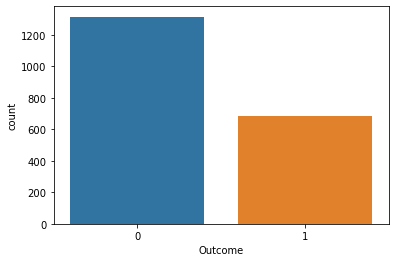

In [9]:
# Outcome countplot
sns.countplot(x = 'Outcome',data = dataset)

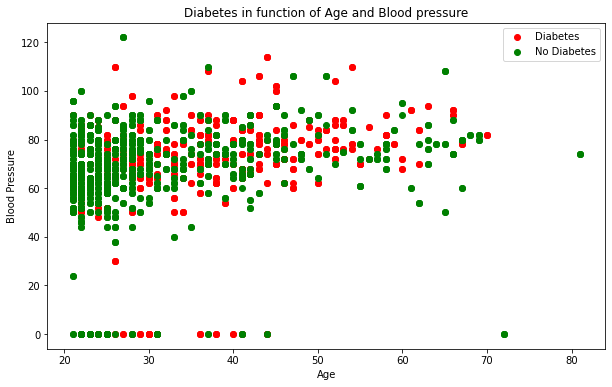

In [10]:
#finding out the Blood Pressure and age of entries who have diabetes
plt.figure(figsize=(10,6))
# Scatter with positive example
plt.scatter(dataset.Age[dataset.Outcome==1],dataset.BloodPressure[dataset.Outcome==1],c="red");

# Scatter with negative example
plt.scatter(dataset.Age[dataset.Outcome==0],dataset.BloodPressure[dataset.Outcome==0],c="green");

# Add some helpful info
plt.title("Diabetes in function of Age and Blood pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend(["Diabetes","No Diabetes"]);

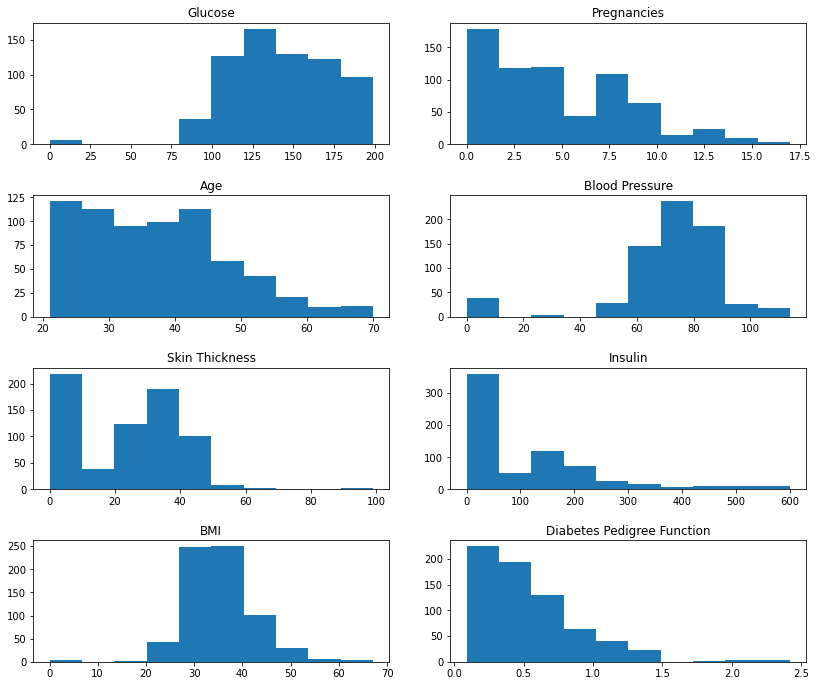

In [11]:
# Histogram of all coloumns when the Outcome is 1(Diabetes)
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Glucose')
ax[0,0].hist(dataset.Glucose[dataset.Outcome==1]);
ax[0,1].set_title('Pregnancies')
ax[0,1].hist(dataset.Pregnancies[dataset.Outcome==1]);
ax[1,0].set_title('Age')
ax[1,0].hist(dataset.Age[dataset.Outcome==1]);
ax[1,1].set_title('Blood Pressure')
ax[1,1].hist(dataset.BloodPressure[dataset.Outcome==1]);
ax[2,0].set_title('Skin Thickness')
ax[2,0].hist(dataset.SkinThickness[dataset.Outcome==1]);
ax[2,1].set_title('Insulin')
ax[2,1].hist(dataset.Insulin[dataset.Outcome==1]);
ax[3,0].set_title('BMI')
ax[3,0].hist(dataset.BMI[dataset.Outcome==1]);
ax[3,1].set_title('Diabetes Pedigree Function')
ax[3,1].hist(dataset.DiabetesPedigreeFunction[dataset.Outcome==1]);


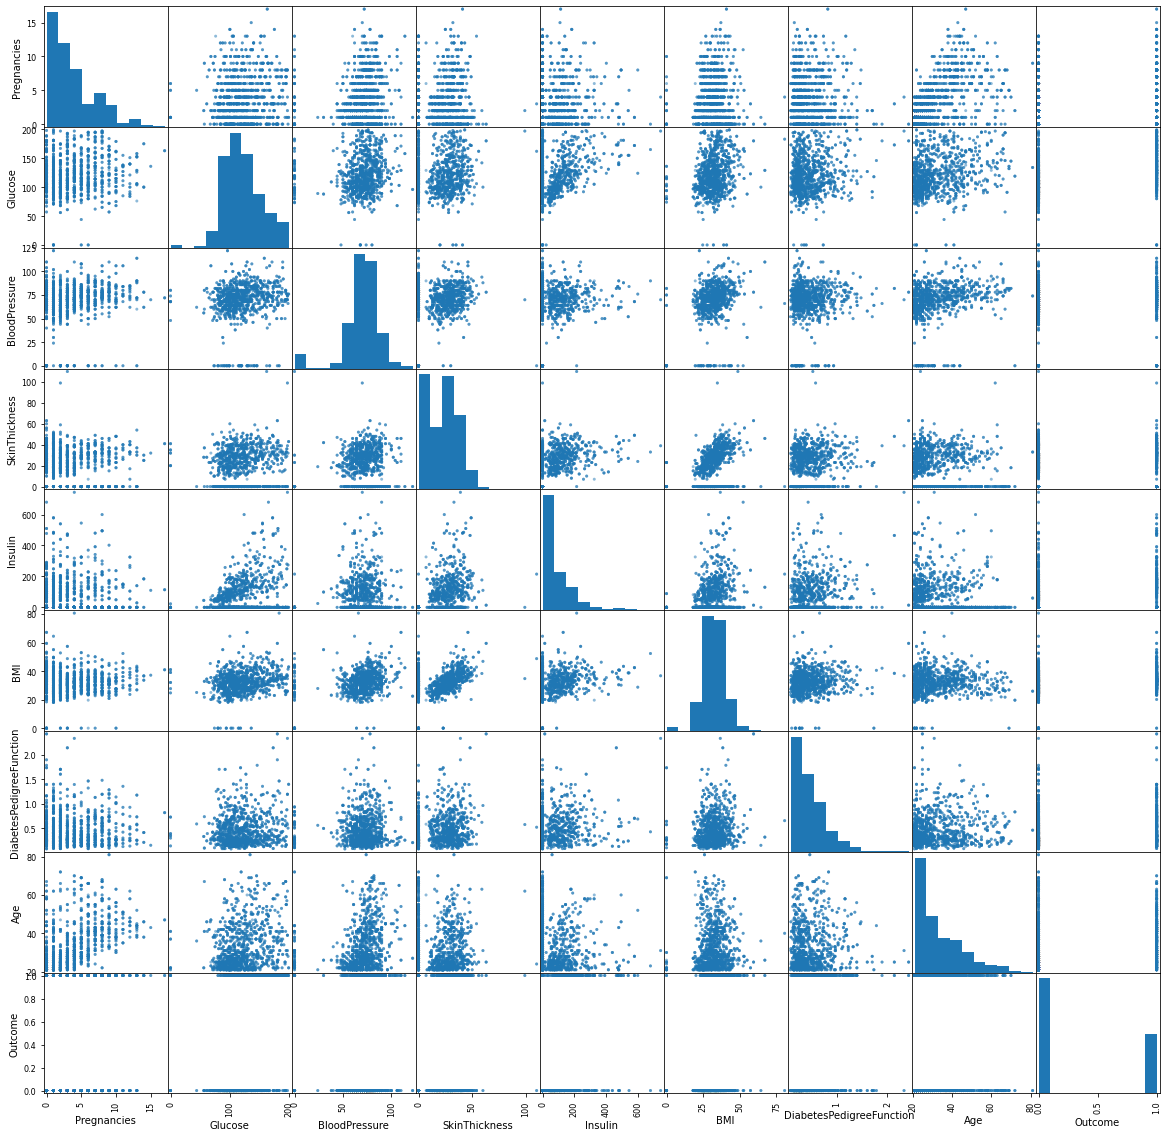

In [12]:
# Scatter plot matrix 
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (20, 20));

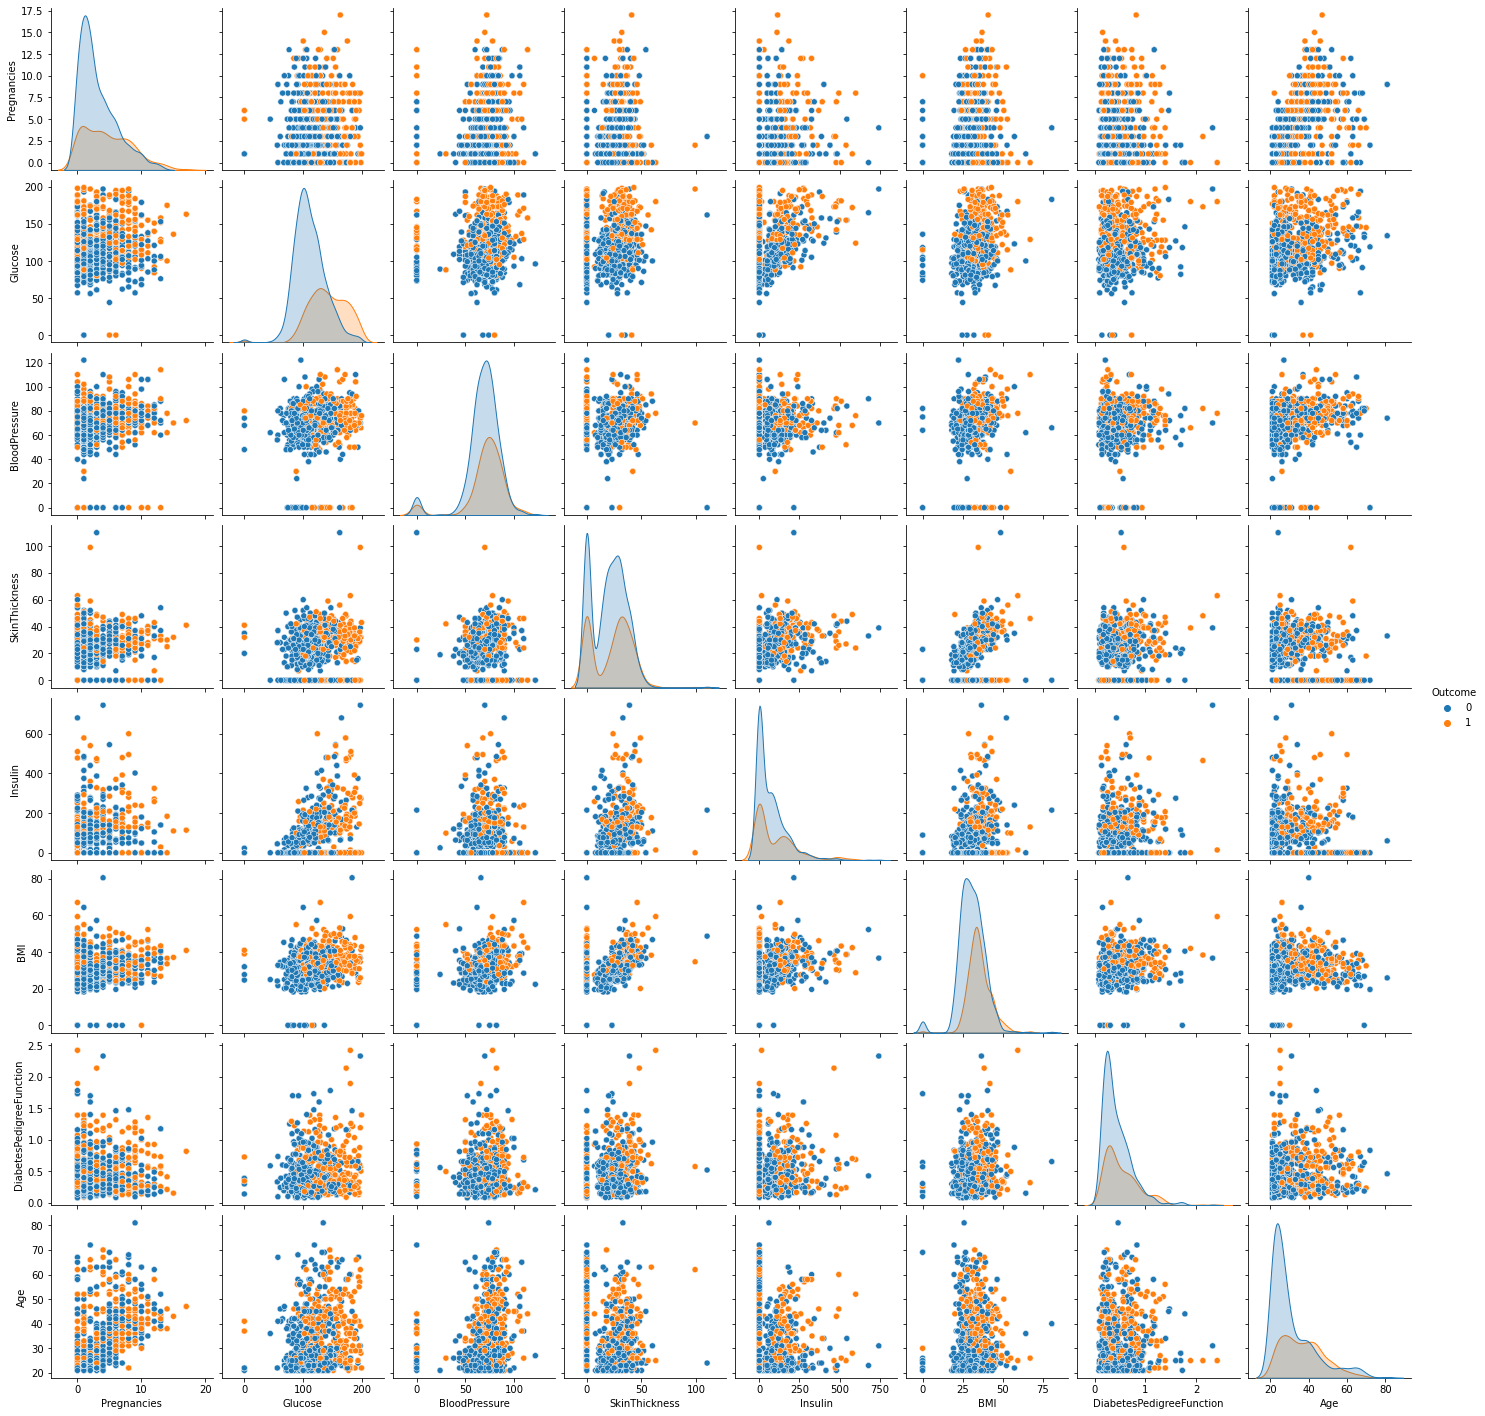

In [13]:
# Pairplot 
sns.pairplot(data = dataset, hue = 'Outcome')
plt.show()

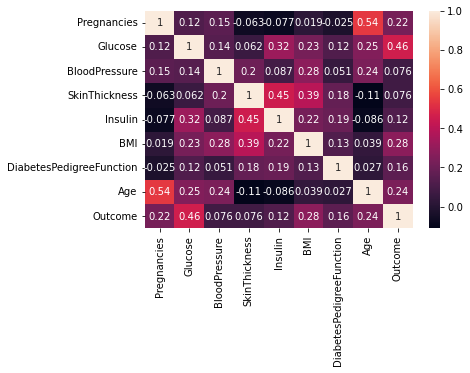

<Figure size 720x720 with 0 Axes>

In [14]:
# Heatmap
sns.heatmap(dataset.corr(), annot = True)
plt.figure(figsize=(10,10))
plt.show()

In [15]:
dataset_new = dataset

In [16]:
 #Replacing zero values with NaN
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0,np.NaN)

In [17]:
# Count of NaN
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [18]:
# Replacing NaN with mean values
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

In [19]:
# Statistical summary
dataset_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.703500,3.306063,0.000,1.000,3.000000,6.000000,17.00
Glucose,2000.0,121.975340,30.533114,44.000,99.000,118.000000,141.000000,199.00
BloodPressure,2000.0,72.403665,11.949531,24.000,64.000,72.000000,80.000000,122.00
SkinThickness,2000.0,29.341275,9.123652,7.000,25.000,29.341275,32.000000,110.00
Insulin,2000.0,153.743295,80.376307,14.000,120.000,153.743295,153.743295,744.00
BMI,2000.0,32.650101,7.190136,18.200,27.600,32.400000,36.800000,80.60
DiabetesPedigreeFunction,2000.0,0.470930,0.323553,0.078,0.244,0.376000,0.624000,2.42
Age,2000.0,33.090500,11.786423,21.000,24.000,29.000000,40.000000,81.00
Outcome,2000.0,0.342000,0.474498,0.000,0.000,0.000000,1.000000,1.00


In [20]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

In [21]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [22]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataset_scaled.iloc[:, [1, 4, 5, 7]].values
Y = dataset_scaled.iloc[:, 8].values

In [23]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset_new['Outcome'] )

In [24]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (1600, 4)
X_test shape: (400, 4)
Y_train shape: (1600,)
Y_test shape: (400,)


In [25]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [26]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)

In [27]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)

In [31]:
# Accuracy on test set
print("Logistic Regression: ",accuracy_logreg)

Logistic Regression:  0.775


In [29]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_logreg)
cm

array([[235,  28],
       [ 62,  75]], dtype=int64)

In [30]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_logreg))

              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       263
         1.0       0.73      0.55      0.62       137

    accuracy                           0.78       400
   macro avg       0.76      0.72      0.73       400
weighted avg       0.77      0.78      0.77       400

